In [1]:
import matplotlib.pyplot as plt

In [2]:
import itertools
import os

In [3]:
import numpy as np
import pandas as pd

In [4]:
from typing import List

In [14]:
def plot_throughput(throughput_list: List[List[float]], labels: List[str], param, ax: plt.Axes):
    ax.set_title("Throughput (cache_ratio={} delay_epoch={} cache_min_neighbor={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Throughput (samples/s)")
    for througput, label in zip(throughput_list, labels):
        ax.plot(througput, label=label)
    delay_epoch = param[-2]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.grid(axis='y')
    ax.legend()


def plot_vals(val_list: List[List[float]], labels: List[str], param, ax: plt.Axes):
    ax.set_title("Val AP (cache_ratio={} delay_epoch={} cache_min_neighbor={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Val AP")
    for val, label in zip(val_list, labels):
        ax.plot(val, label=label)
    delay_epoch = param[-2]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.set_ylim((0.94, 1))
    ax.grid(axis='y')
    ax.legend()


(0.2, 0, 0) 0.5740990086669938
(0.2, 0, 3) 0.15617754342879844
(0.2, 0, 5) 0.1531546115502794
(0.2, 2, 0) 0.5742580050547432
(0.2, 2, 3) 0.15599349639093602
(0.2, 2, 5) 0.152875442856546
(0.4, 0, 0) 0.6805859763096975
(0.4, 0, 3) 0.1992939080359653
(0.4, 0, 5) 0.19642499782245232
(0.4, 2, 0) 0.6784891572288564
(0.4, 2, 3) 0.19927615128539047
(0.4, 2, 5) 0.1961994357495969


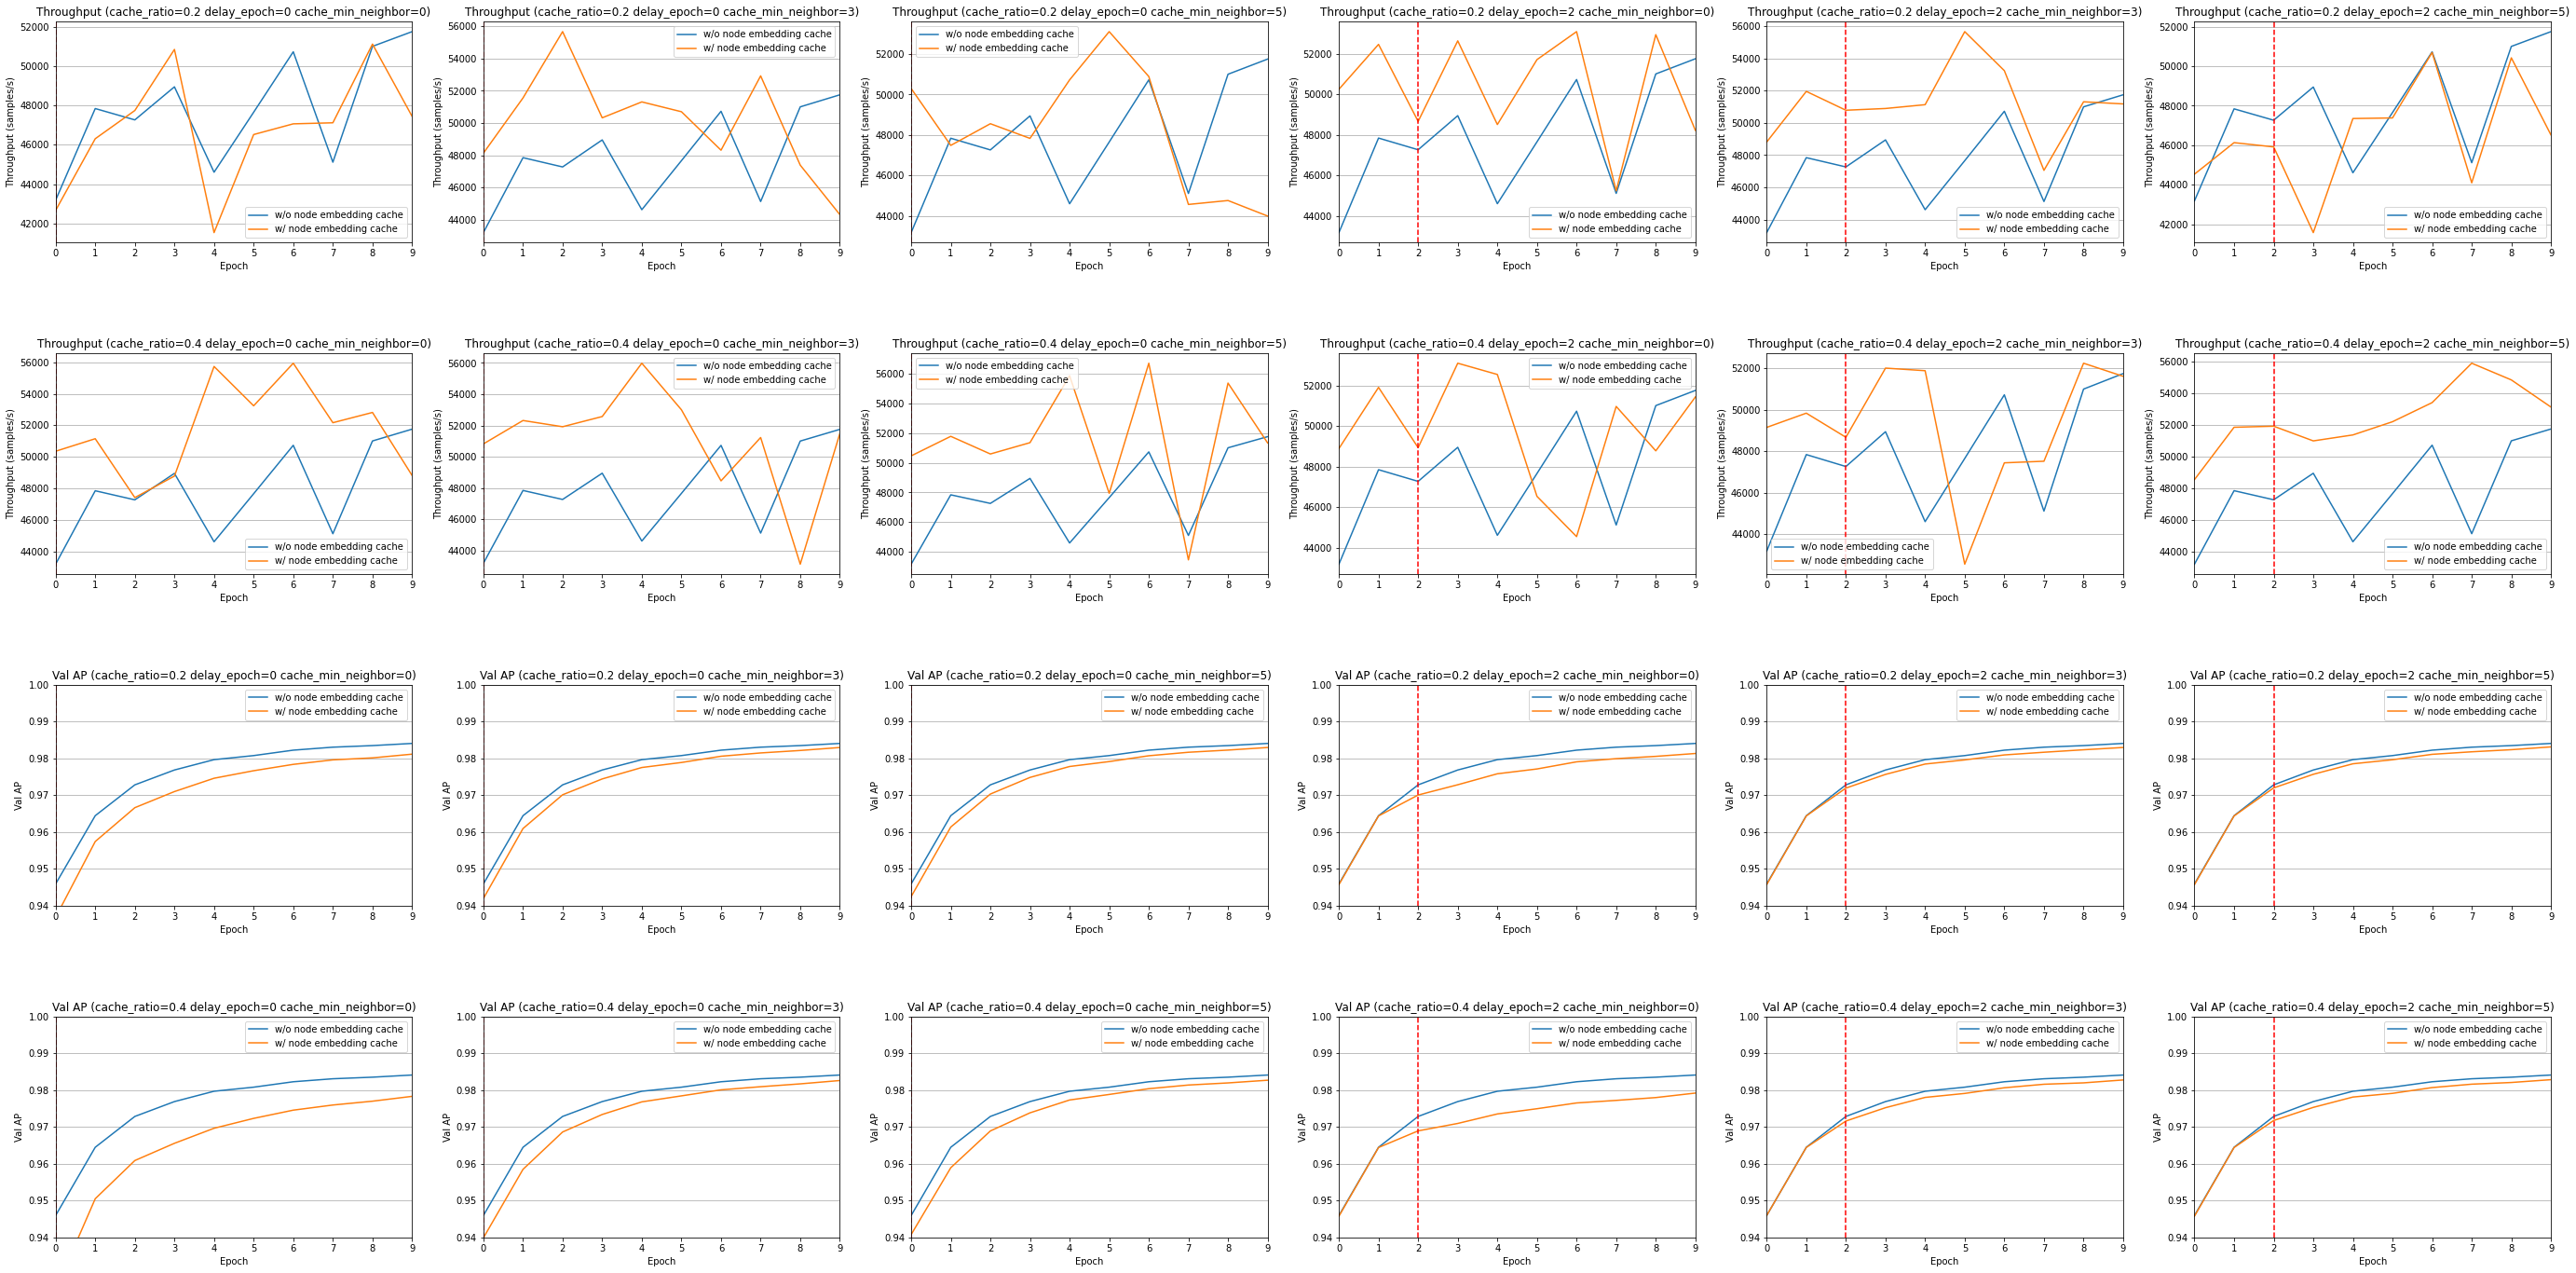

In [15]:
cache_ratio = [0.2, 0.4]
delay_epoch = [0, 2]
cache_min_neighbor = [0, 3, 5]
param_space = list(itertools.product(cache_ratio, delay_epoch, cache_min_neighbor))

ncols = 6
nrows = len(param_space) // ncols * 2
if nrows == 0:
    nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(48, nrows * 6)
fig.subplots_adjust(hspace=0.5)

model = 'TGAT'
dataset = 'REDDIT'
i = 0
out_dir = "tmp_res/yczhong_delay_lru/"


postfix = '||model{}||dataset{}||cache_ratio{}||delay_epoch{}||cache_min_neighbor{}.npy'

file = out_dir+"throughput" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_throughput = np.load(file)
file = out_dir+"val_ap" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_vals = np.load(file)

for param in param_space:
    file = out_dir+"throughput" + postfix.format(model, dataset,*param)
    throughput = np.load(file)
    file = out_dir+"val_ap" + postfix.format(model, dataset, *param)
    vals = np.load(file)
    node_embedding_hit_rate = np.load(out_dir+"node_embed_cache_hit_rate" + postfix.format(model, dataset, *param))
    print(param, node_embedding_hit_rate)
    labels = ["w/o node embedding cache", "w/ node embedding cache"]
    plot_throughput([no_cache_throughput, throughput], labels, param, axes[i//ncols][i%ncols])
    plot_vals([no_cache_vals, vals], labels, param, axes[i//ncols+nrows//2][i%ncols])
    i += 1
plt.savefig(out_dir+"{}_{}_lru_result.png".format(model, dataset), dpi=400, bbox_inches='tight')

(0.2, 0, 0) 0.5438716726894449
(0.2, 0, 0) 0.5740990086669938
(0.2, 0, 3) 0.151172370425291
(0.2, 0, 3) 0.15617754342879844
(0.2, 0, 5) 0.14885538888168942
(0.2, 0, 5) 0.1531546115502794
(0.2, 2, 0) 0.543654519845426
(0.2, 2, 0) 0.5742580050547432
(0.2, 2, 3) 0.1512458228262232
(0.2, 2, 3) 0.15599349639093602
(0.2, 2, 5) 0.14882254863012778
(0.2, 2, 5) 0.152875442856546
(0.4, 0, 0) 0.747047493200032
(0.4, 0, 0) 0.6805859763096975
(0.4, 0, 3) 0.20041497331353358
(0.4, 0, 3) 0.1992939080359653
(0.4, 0, 5) 0.1981251137458848
(0.4, 0, 5) 0.19642499782245232
(0.4, 2, 0) 0.7451196376560665
(0.4, 2, 0) 0.6784891572288564
(0.4, 2, 3) 0.200412636433099
(0.4, 2, 3) 0.19927615128539047
(0.4, 2, 5) 0.1980528297851699
(0.4, 2, 5) 0.1961994357495969


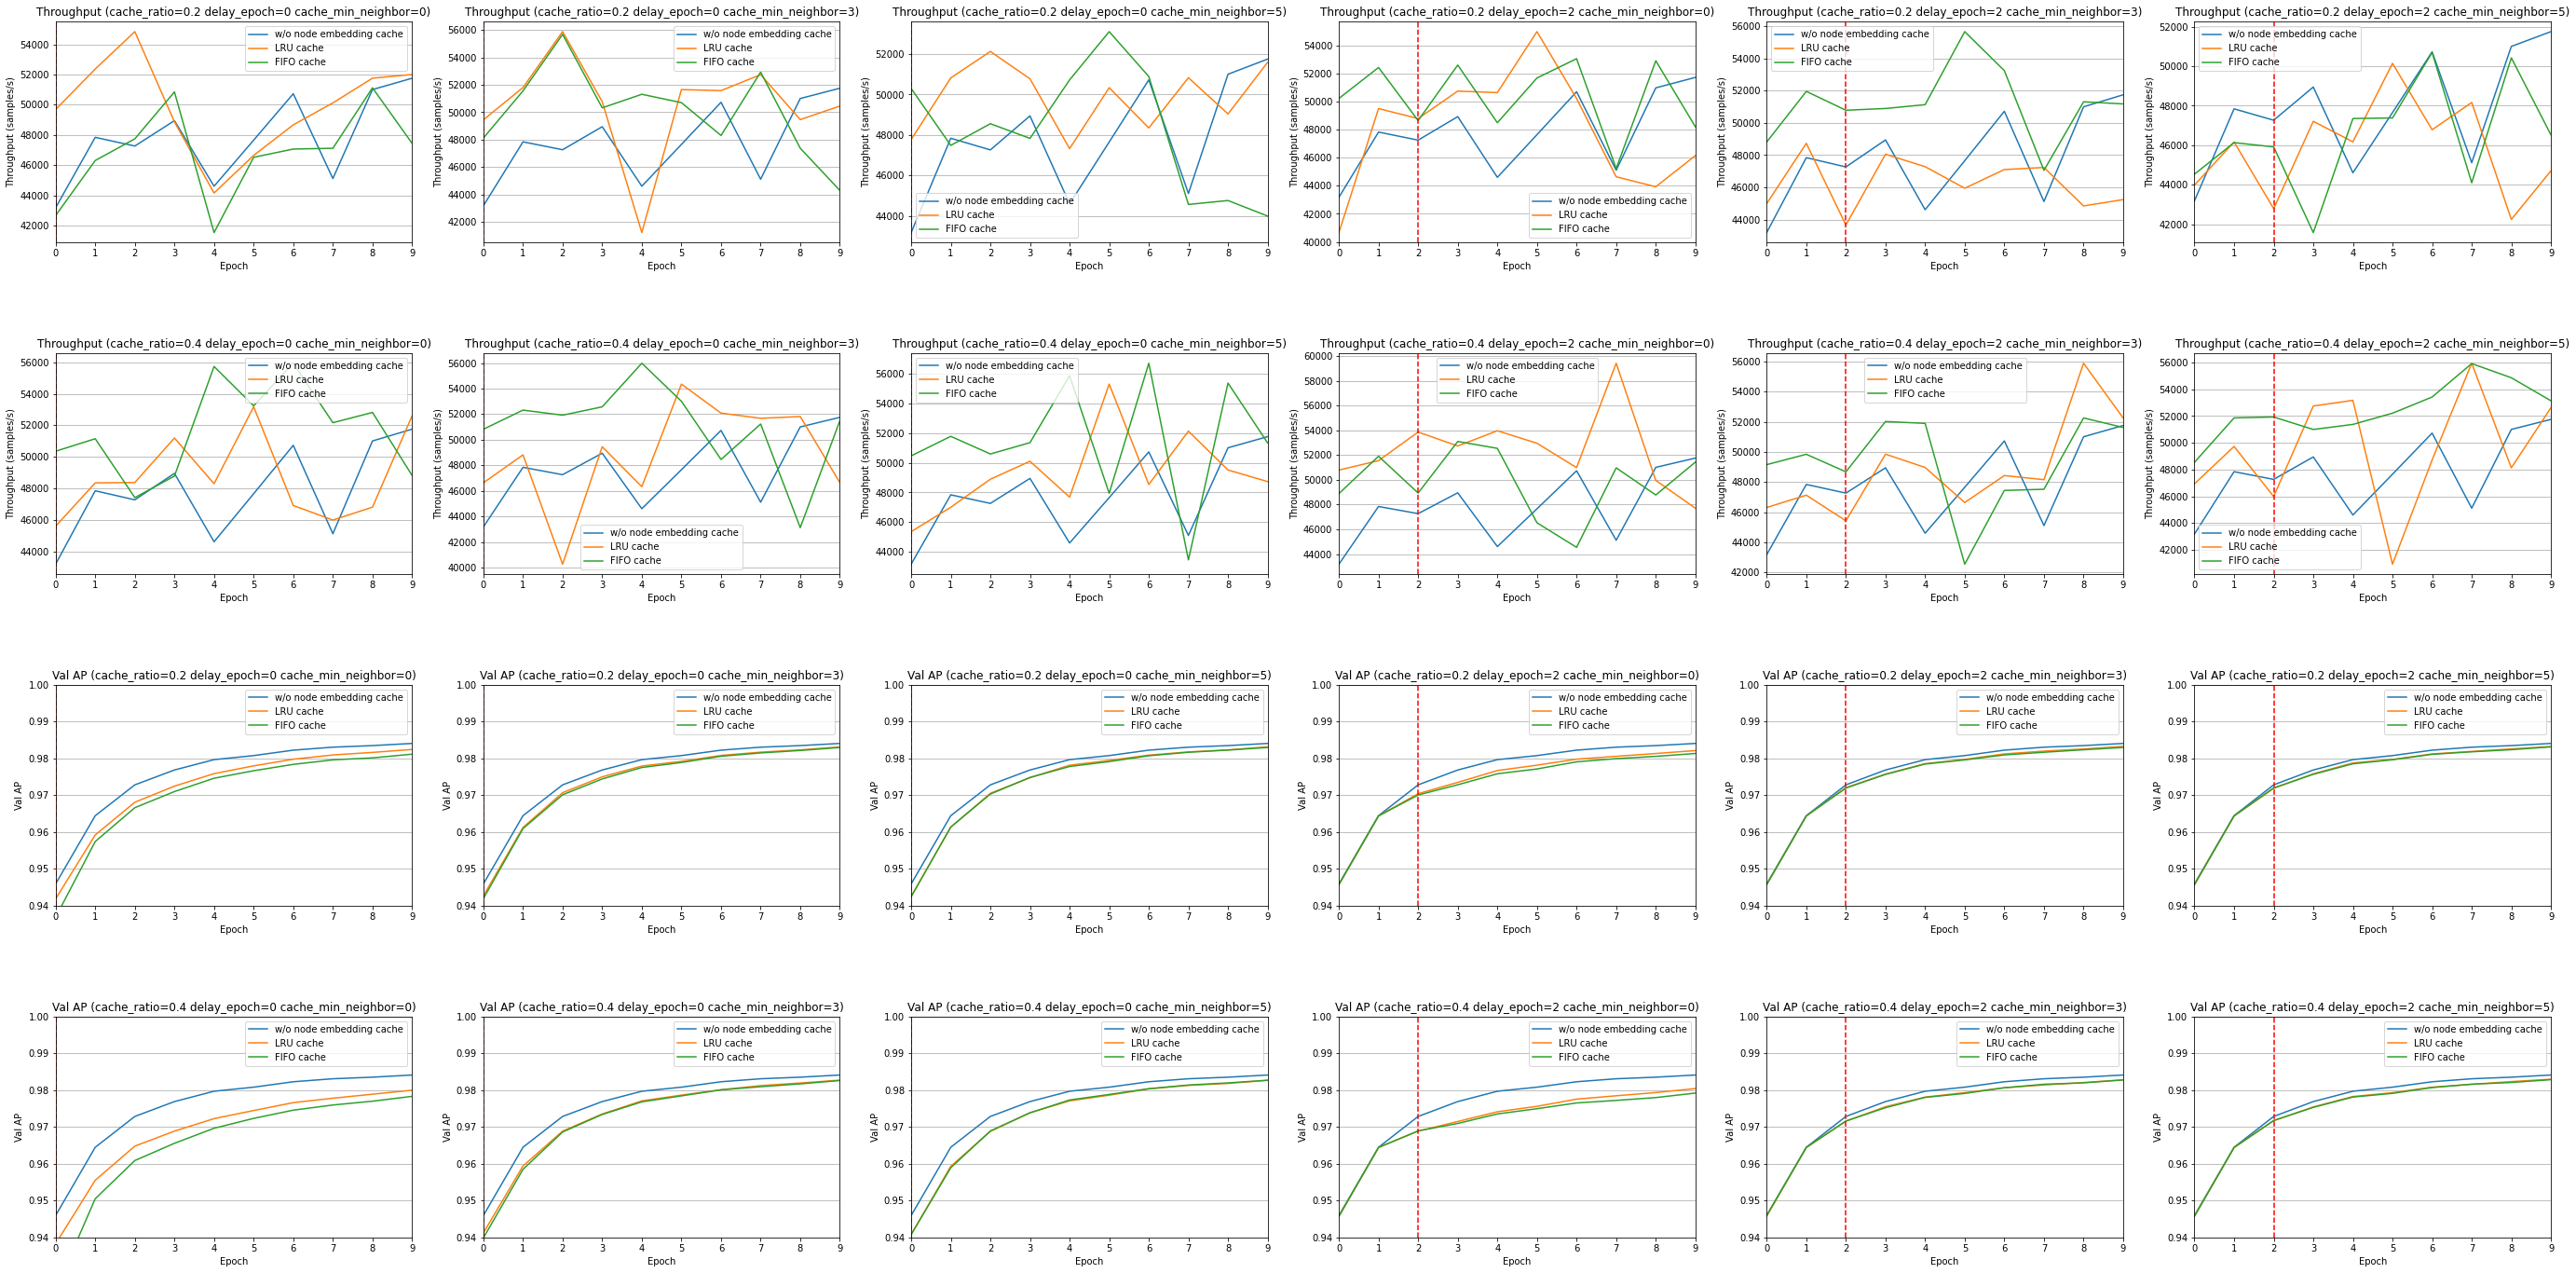

In [21]:
cache_ratio = [0.2, 0.4]
delay_epoch = [0, 2]
cache_min_neighbor = [0, 3, 5]
param_space = list(itertools.product(cache_ratio, delay_epoch, cache_min_neighbor))

ncols = 6
nrows = len(param_space) // ncols * 2
if nrows == 0:
    nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(48, nrows * 6)
fig.subplots_adjust(hspace=0.5)

model = 'TGAT'
dataset = 'REDDIT'
i = 0
fifo_out_dir = "tmp_res/yczhong_delay_fifo/"
lru_out_dur = "tmp_res/yczhong_delay_lru/"

postfix = '||model{}||dataset{}||cache_ratio{}||delay_epoch{}||cache_min_neighbor{}.npy'

file = lru_out_dur + "throughput" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_throughput = np.load(file)
file = lru_out_dur+"val_ap" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_vals = np.load(file)

for param in param_space:
    throughput_list = [no_cache_throughput]
    val_list = [no_cache_vals]
    for cache_type in ["lru", "fifo"]:
        subdir = "tmp_res/yczhong_delay_{}/".format(cache_type)
        file = subdir+"throughput" + postfix.format(model, dataset,*param)
        throughput = np.load(file)
        file = subdir+"val_ap" + postfix.format(model, dataset, *param)
        vals = np.load(file)
        node_embedding_hit_rate = np.load(subdir+"node_embed_cache_hit_rate" + postfix.format(model, dataset, *param))
        print(param, node_embedding_hit_rate)
        throughput_list.append(throughput)
        val_list.append(vals)
    labels = ["w/o node embedding cache", "LRU cache", "FIFO cache"]
    plot_throughput(throughput_list,labels, param, axes[i//ncols][i%ncols])
    plot_vals(val_list, labels, param, axes[i//ncols+nrows//2][i%ncols])
    i += 1
plt.savefig(out_dir+"{}_{}_fifo_result.png".format(model, dataset), dpi=400, bbox_inches='tight')

In [4]:
import pandas as pd
import numpy as np
import timeit

# Create dataframe with multi-index
ukeys = ['ukey1', 'ukey2', 'ukey3']
dates = pd.date_range(start='2021-01-01', end='2021-03-31')
ticktimes = pd.to_datetime(np.arange(0, 24*60*60*len(dates), 30), unit='s')
df = pd.DataFrame(np.random.rand(len(ukeys)*len(dates)*len(ticktimes)), 
                  columns=['value'],
                  index=pd.MultiIndex.from_product([ukeys, dates, ticktimes], 
                                                   names=['ukey', 'date', 'ticktime']))
print(df)
# Groupby by ukey with index
start_time = timeit.default_timer()
df.groupby('ukey').mean()
end_time = timeit.default_timer()
time_with_index = end_time - start_time

# Groupby by ukey without index
start_time = timeit.default_timer()
df.reset_index().groupby('ukey').mean()
end_time = timeit.default_timer()
time_without_index = end_time - start_time

# Print results
print(f'Time with index: {time_with_index:.6f} seconds')
print(f'Time without index: {time_without_index:.6f} seconds')

                                         value
ukey  date       ticktime                     
ukey1 2021-01-01 1970-01-01 00:00:00  0.050686
                 1970-01-01 00:00:30  0.983101
                 1970-01-01 00:01:00  0.486419
                 1970-01-01 00:01:30  0.786646
                 1970-01-01 00:02:00  0.273176
...                                        ...
ukey3 2021-03-31 1970-03-31 23:57:30  0.168761
                 1970-03-31 23:58:00  0.754438
                 1970-03-31 23:58:30  0.797408
                 1970-03-31 23:59:00  0.995475
                 1970-03-31 23:59:30  0.906949

[69984000 rows x 1 columns]
Time with index: 18.625425 seconds
Time without index: 40.565902 seconds


<ipython-input-4-706082ab395a>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.reset_index().groupby('ukey').mean()


In [72]:
import pandas as pd

data_dict = {
    'df1': pd.DataFrame({'id': [1, 2, 3], 'value': [4, 5, 6]}),
    'df2': pd.DataFrame({'id': [4, 5, 6], 'value': [7, 8, 9]}),
    'df3': pd.DataFrame({'id': [7, 8, 9], 'value': [10, 11, 12]})
}

big_df = pd.concat(data_dict.values(), keys=data_dict.keys(), names=['key', 'index']).droplevel(1).reset_index()
print(big_df)

big_df.to_feather("tmp.feather")
big_df = pd.read_feather("tmp.feather")
new_dict = {key: group.drop('key', axis=1)
            for key, group in big_df.groupby('key')}

for key, df in new_dict.items():
    print(key, df)

   key  id  value
0  df1   1      4
1  df1   2      5
2  df1   3      6
3  df2   4      7
4  df2   5      8
5  df2   6      9
6  df3   7     10
7  df3   8     11
8  df3   9     12


KeyError: "['key'] not found in axis"